In [1]:
# dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt
import numpy as np
import pandas as pd

In [2]:
# create engine
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [3]:
# declare base
Base = automap_base()

In [4]:
# reflect database tables
Base.prepare(engine, reflect=True)

In [5]:
# view tables 
Base.classes.keys()

['measurement', 'station']

In [6]:
# assign the each class to a variable
measurement = Base.classes.measurement
station = Base.classes.station

## Precipitation Analysis

In [7]:
# start session
session = Session(engine)

In [65]:
# find most recent date in dataset
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [74]:
# calculate the date one year from the last date in data set
dt.date(2017, 8, 23) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [72]:
# query to retrieve the previous 12 months of precipitation data
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
print(precipitation)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [81]:
# load query results into a Pandas DataFrame, set index to "date" column
rain_data = pd.DataFrame(precipitation).sort_values(by = 'date').set_index('date')
#rename 'prcp' to 'precipitation'
rain_data.rename(columns={'prcp': 'precipitation'}, inplace=True)
rain_data

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


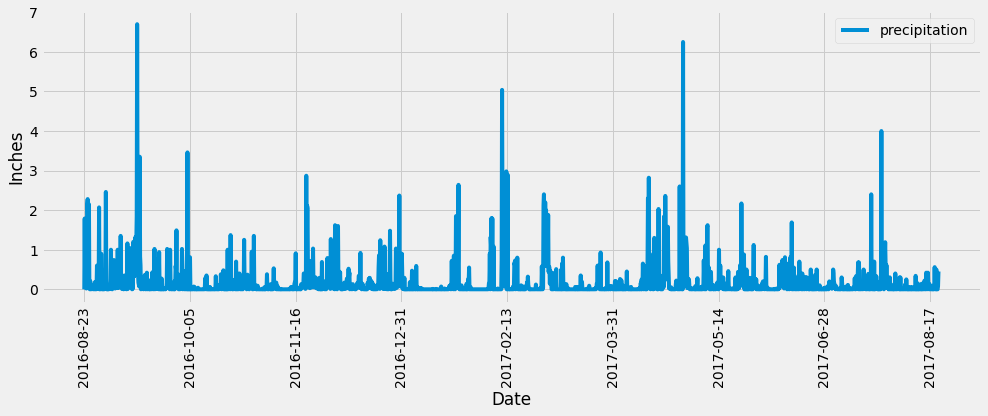

In [103]:
# plot the data
rain_data.plot(figsize=(15,5), rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="upper right")
plt.show()

In [13]:
# summary stats of precipitation data
rain_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [14]:
# calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()

9

In [21]:
# find most activate states; list stations and their count in descending order
session.query(measurement.station, func.count()).group_by(measurement.station).\
order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# calculate the lowest, highest, and average temperature of the most active station
lowest = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
highest = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
average = session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

print(f'Lowest Temperature is {lowest}')
print(f'Highest Temperature is {highest}')
print(f'Average Temperature is {average}')

Lowest Temperature is [(54.0,)]
Highest Temperature is [(85.0,)]
Average Temperature is [(71.66378066378067,)]


In [77]:
# query the last 12 months of temperature observation data for this station
temp = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
# convert results into a DataFrame
temp_data = pd.DataFrame(temp)
temp_data

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


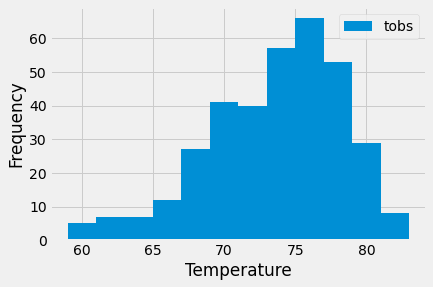

In [49]:
# plot results as a histogram
temp_data.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

In [19]:
# close session
session.close()